#### House Prices <hr>
 - 주택 금융 접근성 우수 여부 분류 (이진 분류)

In [1]:
## !! 데이터 정보
# ========================================================================================
# 1. 위치 및 지역 정보 (13개 컬럼)
# ========================================================================================
# MSZoning - 용도지역
# LotFrontage - 도로 접면 길이
# LotArea - 대지 면적
# Street - 도로 유형
# Alley - 골목길 유형
# LotShape - 대지 형태
# LandContour - 지형 평탄도
# Utilities - 유틸리티/기반시설
# LotConfig - 대지 배치 형태
# LandSlope - 경사도
# Neighborhood - 지역/이웃
# Condition1 - 근접 조건 (주)
# Condition2 - 근접 조건 (2차)

# ========================================================================================
# 2. 건물 기본 정보 (5개 컬럼)
# ========================================================================================
# MSSubClass - 주택 유형 코드
# BldgType - 건물 유형
# HouseStyle - 주택 스타일
# YearBuilt - 건설 연도
# YearRemodAdd - 개조/증축 연도

# ========================================================================================
# 3. 외부 구조 (지붕, 외벽, 기초) (10개 컬럼)
# ========================================================================================
# RoofStyle - 지붕 유형
# RoofMatl - 지붕 재료
# Exterior1st - 외벽 재료 (1차)
# Exterior2nd - 외벽 재료 (2차)
# MasVnrType - 벽돌 마감 유형
# MasVnrArea - 벽돌 마감 면적
# ExterQual - 외벽 품질
# ExterCond - 외벽 상태
# Foundation - 기초 유형

# ========================================================================================
# 4. 지하실 정보 (9개 컬럼)
# ========================================================================================
# BsmtQual - 지하실 높이/품질
# BsmtCond - 지하실 상태
# BsmtExposure - 지하실 노출도
# BsmtFinType1 - 지하실 완성 유형 (1차)
# BsmtFinSF1 - 지하실 완성 면적 (1차)
# BsmtFinType2 - 지하실 완성 유형 (2차)
# BsmtFinSF2 - 지하실 완성 면적 (2차)
# BsmtUnfSF - 지하실 미완성 면적
# TotalBsmtSF - 지하실 총 면적

# ========================================================================================
# 5. 난방 및 냉방 (3개 컬럼)
# ========================================================================================
# Heating - 난방 유형
# HeatingQC - 난방 품질
# CentralAir - 중앙 에어컨 설치 여부

# ========================================================================================
# 6. 전기 시스템 (1개 컬럼)
# ========================================================================================
# Electrical - 전기 시스템 유형

# ========================================================================================
# 7. 생활 공간 (4개 컬럼)
# ========================================================================================
# 1stFlrSF - 1층 면적
# 2ndFlrSF - 2층 면적
# LowQualFinSF - 낮은 품질 완성 면적
# GrLivArea - 지상 생활 면적

# ========================================================================================
# 8. 욕실 및 침실 (8개 컬럼)
# ========================================================================================
# BsmtFullBath - 지하실 전체 욕실 개수
# BsmtHalfBath - 지하실 반욕실 개수
# FullBath - 지상 전체 욕실 개수
# HalfBath - 지상 반욕실 개수
# BedroomAbvGr - 지상 침실 개수
# KitchenAbvGr - 지상 부엌 개수
# KitchenQual - 부엌 품질
# TotRmsAbvGrd - 지상 전체 방 개수 (욕실 제외)

# ========================================================================================
# 9. 기능성 및 편의시설 (3개 컬럼)
# ========================================================================================
# Functional - 기능성 등급
# Fireplaces - 벽난로 개수
# FireplaceQu - 벽난로 품질

# ========================================================================================
# 10. 차고 정보 (8개 컬럼)
# ========================================================================================
# GarageType - 차고 위치 유형
# GarageYrBlt - 차고 건설 연도
# GarageFinish - 차고 완성도
# GarageCars - 차고 수용 자동차 개수
# GarageArea - 차고 면적
# GarageQual - 차고 품질
# GarageCond - 차고 상태
# PavedDrive - 진입로 포장 상태

# ========================================================================================
# 11. 야외 공간 (5개 컬럼)
# ========================================================================================
# WoodDeckSF - 목재 데크 면적
# OpenPorchSF - 개방형 포치 면적
# EnclosedPorch - 폐쇄형 포치 면적
# 3SsnPorch - 3계절 포치 면적
# ScreenPorch - 스크린 포치 면적

# ========================================================================================
# 12. 수영장 및 기타 시설 (5개 컬럼)
# ========================================================================================
# PoolArea - 수영장 면적
# PoolQC - 수영장 품질
# Fence - 울타리 품질
# MiscFeature - 기타 편의시설
# MiscVal - 기타 편의시설 가치

# ========================================================================================
# 13. 판매 정보 (4개 컬럼)
# ========================================================================================
# MoSold - 판매 월
# YrSold - 판매 연도
# SaleType - 판매 유형
# SaleCondition - 판매 조건

# ========================================================================================
# 14. 품질 및 상태 평가 (2개 컬럼)
# ========================================================================================
# OverallQual - 전반적 품질
# OverallCond - 전반적 상태

# ========================================================================================
# 15. 식별자 및 목표 변수 (2개 컬럼)
# ========================================================================================
# Id - 주택 고유 식별자
# SalePrice - 판매 가격 (목표 변수)

In [2]:
## =========================================================
## 모듈 로딩
## =========================================================
## 기본 모듈
import numpy as np
import pandas as pd

## 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

## ML 평가
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

## 교차 검증
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [3]:
## =========================================================
## 파일 로딩
## =========================================================
path='train.csv'
dataDF=pd.read_csv(path)

display(dataDF)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
## 사용 컬럼 선택
use_cols = [
    # 정책·금융 접근성 프록시
    "OverallQual", "GrLivArea", "Neighborhood",
    # 시장 요인
    "HouseStyle", "TotRmsAbvGrd", "FullBath",
    # 경제·건설 요인
    "YearBuilt", "YearRemodAdd", "Foundation",
    # 사회·생활 수준
    "KitchenQual", "ExterQual", "HeatingQC",
    # 타겟 생성용
    "SalePrice",
]

df = dataDF[use_cols].copy()

In [5]:
## 타겟 생성
q1 = df["SalePrice"].quantile(0.4)
q2 = df["SalePrice"].quantile(0.7)


def make_multiclass(row):
    if row["SalePrice"] < q1:
        return 0  # 금융 접근성 낮음
    elif row["SalePrice"] < q2:
        return 1  # 금융 접근성 보통
    else:
        return 2  # 금융 접근성 높음


df["FinanceLevel"] = np.select(
    [
        df["SalePrice"] < q1,
        df["SalePrice"] < q2,
    ],
    [0, 1],
    default=2,
)

In [6]:
df["FinanceLevel"].value_counts(normalize=True)

FinanceLevel
0    0.39726
1    0.30274
2    0.30000
Name: proportion, dtype: float64

In [7]:
## 피쳐 타입 구분
# 수치형
num_features = [
    "GrLivArea",
    "TotRmsAbvGrd",
    "FullBath",
    "YearBuilt",
    "YearRemodAdd",
]

# 순서형 (품질 계열)
ord_features = [
    "OverallQual",
    "KitchenQual",
    "ExterQual",
    "HeatingQC",
]

# 명목형
cat_features = [
    "Neighborhood",
    "HouseStyle",
    "Foundation",
]

X = df[num_features + ord_features + cat_features]
y = df["FinanceLevel"]

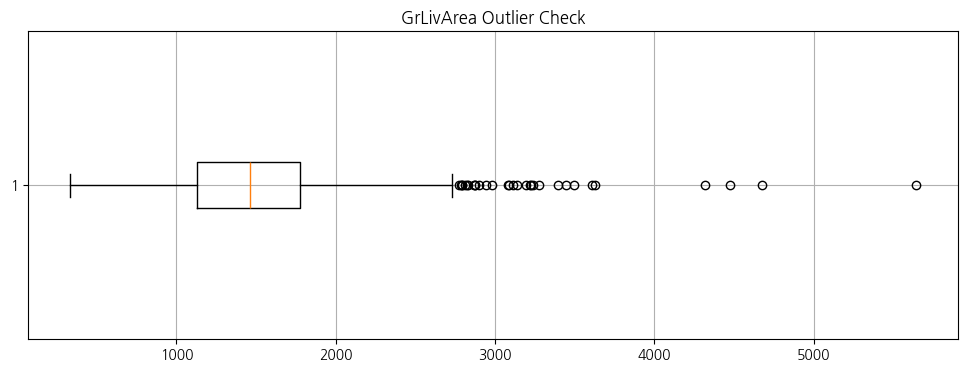

In [8]:
## 이상치 & 결측치 확인
df.isnull().sum()

plt.figure(figsize=(12, 4))
plt.boxplot(df["GrLivArea"], vert=False)
plt.title("GrLivArea Outlier Check")
plt.grid()
plt.show()

In [9]:
df.isnull().sum()

OverallQual     0
GrLivArea       0
Neighborhood    0
HouseStyle      0
TotRmsAbvGrd    0
FullBath        0
YearBuilt       0
YearRemodAdd    0
Foundation      0
KitchenQual     0
ExterQual       0
HeatingQC       0
SalePrice       0
FinanceLevel    0
dtype: int64

In [10]:
## 파이프라인
rf_pipeline = Pipeline(
    [("preprocess",ColumnTransformer(transformers=[
                            # 수치형
                            ("num", "passthrough", num_features),
                            # 순서형
                            ("ord",OrdinalEncoder(
                                handle_unknown="use_encoded_value",
                                unknown_value=-1
                                ),ord_features,
                            ),
                            # 명목형
                            ("cat",OneHotEncoder(
                                handle_unknown="ignore",
                                sparse_output=False,
                                ),cat_features,
                            ),
                    ]),
    ),
    ("model", RandomForestClassifier(
                n_estimators=300,
                min_samples_leaf=5,
                random_state=42,
                n_jobs=-1,
            ),
    ),
    ])

In [11]:
## train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

In [12]:
rf_pipeline.fit(X_train, y_train)

y_test_pred = rf_pipeline.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_test_pred, target_names=["낮음", "보통", "높음"]))

              precision    recall  f1-score   support

          낮음       0.81      0.90      0.85       116
          보통       0.73      0.65      0.69        88
          높음       0.90      0.88      0.89        88

    accuracy                           0.82       292
   macro avg       0.81      0.81      0.81       292
weighted avg       0.81      0.82      0.81       292



In [13]:
preprocess = rf_pipeline.named_steps["preprocess"]

feature_names = (
    num_features
    + ord_features
    + list(preprocess.named_transformers_["cat"].get_feature_names_out(cat_features))
)

In [14]:
importances = rf_pipeline.named_steps["model"].feature_importances_

fi_df = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values(
    "importance", ascending=False
)

fi_df.head(5)

,feature,importance
0,GrLivArea,0.198768
5,OverallQual,0.181892
3,YearBuilt,0.116462
2,FullBath,0.068979
4,YearRemodAdd,0.068270


In [15]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42,
)

cv_acc = cross_val_score(
    rf_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
)

print("CV Accuracy mean:", np.nanmean(cv_acc))

CV Accuracy mean: 0.7859432889475808


## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt_pipeline = Pipeline(
    [
        (
            "preprocess",
            ColumnTransformer(
                transformers=[
                    # 수치형: 그대로 사용
                    ("num", "passthrough", num_features),
                    # 순서형: unknown 값만 안전 처리
                    (
                        "ord",
                        OrdinalEncoder(
                            handle_unknown="use_encoded_value", unknown_value=-1
                        ),
                        ord_features,
                    ),
                    # 명목형: unknown category 무시
                    (
                        "cat",
                        OneHotEncoder(
                            handle_unknown="ignore",
                            sparse_output=False,
                        ),
                        cat_features,
                    ),
                ]
            ),
        ),
        (
            "model",
            DecisionTreeClassifier(
                max_depth=6,  # 과적합 방지
                min_samples_leaf=10,
                random_state=42,
            ),
        ),
    ]
)

In [18]:
from sklearn.metrics import classification_report, f1_score

dt_pipeline.fit(X_train, y_train)

y_test_pred_dt = dt_pipeline.predict(X_test)

print(
    classification_report(y_test, y_test_pred_dt, target_names=["낮음", "보통", "높음"])
)

print("DT Hold-out Macro-F1:", f1_score(y_test, y_test_pred_dt, average="macro"))

print("DT Hold-out Weighted-F1:", f1_score(y_test, y_test_pred_dt, average="weighted"))

              precision    recall  f1-score   support

          낮음       0.79      0.84      0.81       116
          보통       0.66      0.68      0.67        88
          높음       0.92      0.82      0.87        88

    accuracy                           0.78       292
   macro avg       0.79      0.78      0.78       292
weighted avg       0.79      0.78      0.79       292

DT Hold-out Macro-F1: 0.7831921407140449
DT Hold-out Weighted-F1: 0.7859272555524355


In [21]:
import joblib

joblib.dump(rf_pipeline, "finance_rf.pkl")

['finance_rf.pkl']

In [22]:
category_info = {
    "Neighborhood": sorted(df["Neighborhood"].unique()),
    "HouseStyle": sorted(df["HouseStyle"].unique()),
    "Foundation": sorted(df["Foundation"].unique()),
}

joblib.dump(category_info, "finance_categories.pkl")

['finance_categories.pkl']